<a href="https://www.kaggle.com/code/talhasarlik/akbank-bootcamp-project?scriptVersionId=203131400" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


import warnings
warnings.filterwarnings("ignore")

# Uploading the dataset

In [2]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 

for dir_name, _,filenames in os.walk(fish_dir):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dir_name.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dir_name)[-1])         # Append the directory name to label 
                path.append(os.path.join(dir_name,filename))     # Append all the png files to path of that directory

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

# **Data Analysis**

In [3]:
# General information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [4]:
# First five elements of dataset

data.head()

path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel

In [5]:
# Showcase how many data for each category

data['label'].value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

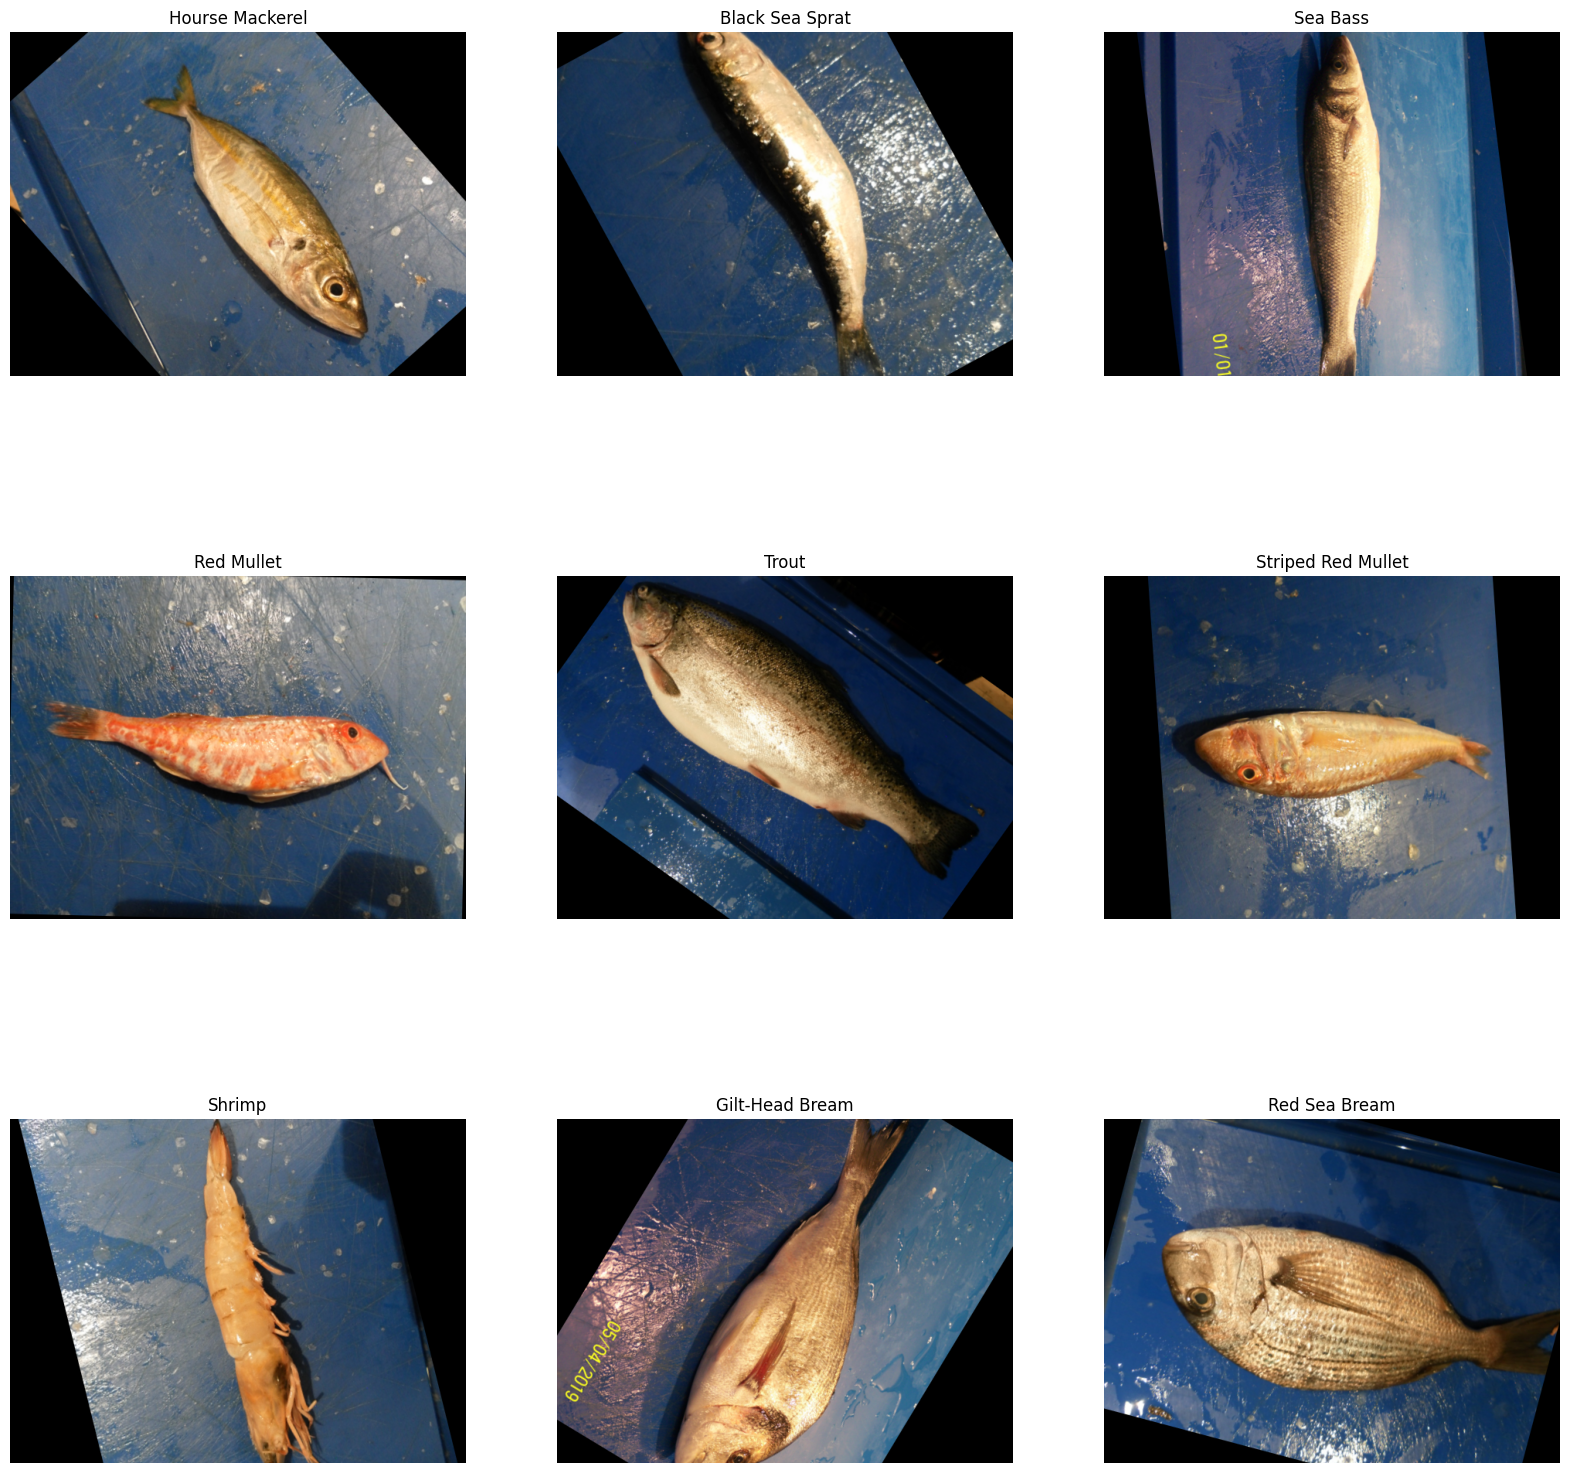

In [6]:
# Show an image for every category

temp = 0
plt.figure(figsize=(20,20))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, temp+1)
    plt.imshow(plt.imread(data[data['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    temp+=1

# **Data preprocessing**

In [7]:
# Split train and test data

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)

In [8]:
train_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input, validation_split=0.2, rescale=1./255)
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input, rescale=1./255)

In [9]:
# Creating train, validation and test datasets

train_images = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [10]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

# **Building Model**

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    38,535,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,569,481 (147.13 MB)

 Trainable params: 38,569,481 (147.13 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# **Train the Model**

In [13]:
history = model.fit(train_images, validation_data = val_images, epochs = 10, callbacks=[Callback, lr_schedule])

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 180s 962ms/step - accuracy: 0.3361 - loss: 1.7892 - val_accuracy: 0.6389 - val_loss: 1.0280 - learning_rate: 0.0010
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 130s 704ms/step - accuracy: 0.6486 - loss: 1.0099 - val_accuracy: 0.7479 - val_loss: 0.7014 - learning_rate: 0.0011
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 129s 701ms/step - accuracy: 0.7693 - loss: 0.6601 - val_accuracy: 0.7944 - val_loss: 0.5339 - learning_rate: 0.0013
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 129s 701ms/step - accuracy: 0.8303 - loss: 0.4885 - val_accuracy: 0.8660 - val_loss: 0.3901 - learning_rate: 0.0014
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 696ms/step - accuracy: 0.8685 - loss: 0.3763 - val_accuracy: 0.8965 - val_loss: 0.3251 - learning_rate: 0.0016
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 698ms/step - accuracy: 0.8901 - loss: 0.3169 - val_accuracy: 0.9167 - val_loss: 0.2624 - learning_rate: 0.0018
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 697ms/step - accura

In [14]:
# Accuracy of training and valudation dataset

print('Training accuracy is : {:.3f}%'.format(history.history['accuracy'][-1] * 100))
print('Validation accuracy is : {:.3f}%'.format(history.history['val_accuracy'][-1] * 100))

Training accuracy is : 89.549%
Validation accuracy is : 92.083%


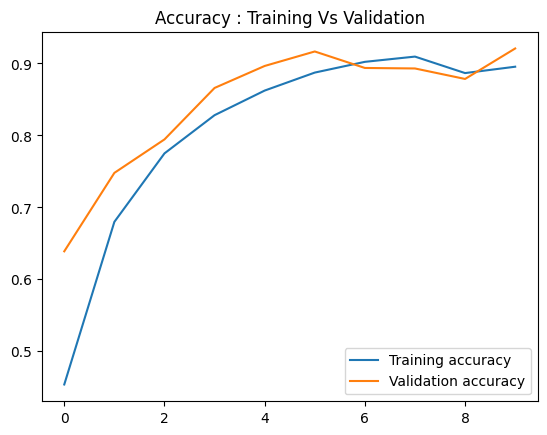

In [15]:
# Accuracy graph for training and validation

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Accuracy : Training Vs Validation')
plt.show()

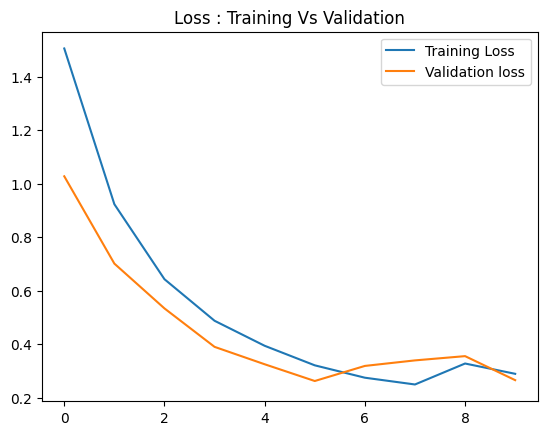

In [16]:
# Loss graph for training and validation

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss : Training Vs Validation')
plt.show()

# **Results**

In [17]:
# Loss and accuracy on test data

test_loss_acc = model.evaluate(test_images)
print('Test loss is : {:.3f}%'.format(test_loss_acc[0]))
print('Test accuracy is : {:.3f}%'.format(test_loss_acc[1]*100))

57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 609ms/step - accuracy: 0.9145 - loss: 0.3028
Test loss is : 0.265%
Test accuracy is : 91.722%


In [18]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 392ms/step


In [19]:
# Creating DataFrame for predicted data

predict_data=test_data.copy()
labels={}
for i,j in test_images.class_indices.items():
    labels.update({j:i})
predict_data['pred']=pred
predict_data['pred']=predict_data['pred'].apply(lambda x: labels[x])

In [20]:
predict_data=predict_data.reset_index(drop=True)
predict_data.head()

path            label  \
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Gilt-Head Bream   
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Black Sea Sprat   
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel   
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...            Trout   
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream   

              pred  
0  Gilt-Head Bream  
1  Black Sea Sprat  
2  Hourse Mackerel  
3            Trout  
4            Trout

In [21]:
predict_data[predict_data['label']!=predict_data['pred']]

path               label  \
4     /kaggle/input/a-large-scale-fish-dataset/Fish_...       Red Sea Bream   
19    /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
52    /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   
57    /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   
65    /kaggle/input/a-large-scale-fish-dataset/Fish_...          Red Mullet   
...                                                 ...                 ...   
1698  /kaggle/input/a-large-scale-fish-dataset/Fish_...     Black Sea Sprat   
1700  /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
1723  /kaggle/input/a-large-scale-fish-dataset/Fish_...     Black Sea Sprat   
1773  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   
1792  /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   

                    pred  
4                  Trout  
19            Red Mullet  
52       Black Sea Sprat  
57       Gilt-Head Bream  
65       Gilt-Head Bream  
...                  ...  
1698     Gilt-Head Bream  
1700     Gilt-Head Bream  
1723     Gilt-Head Bream  
1773     Gilt-Head Bream  
1792  Striped Red Mullet  

[149 rows x 3 columns]

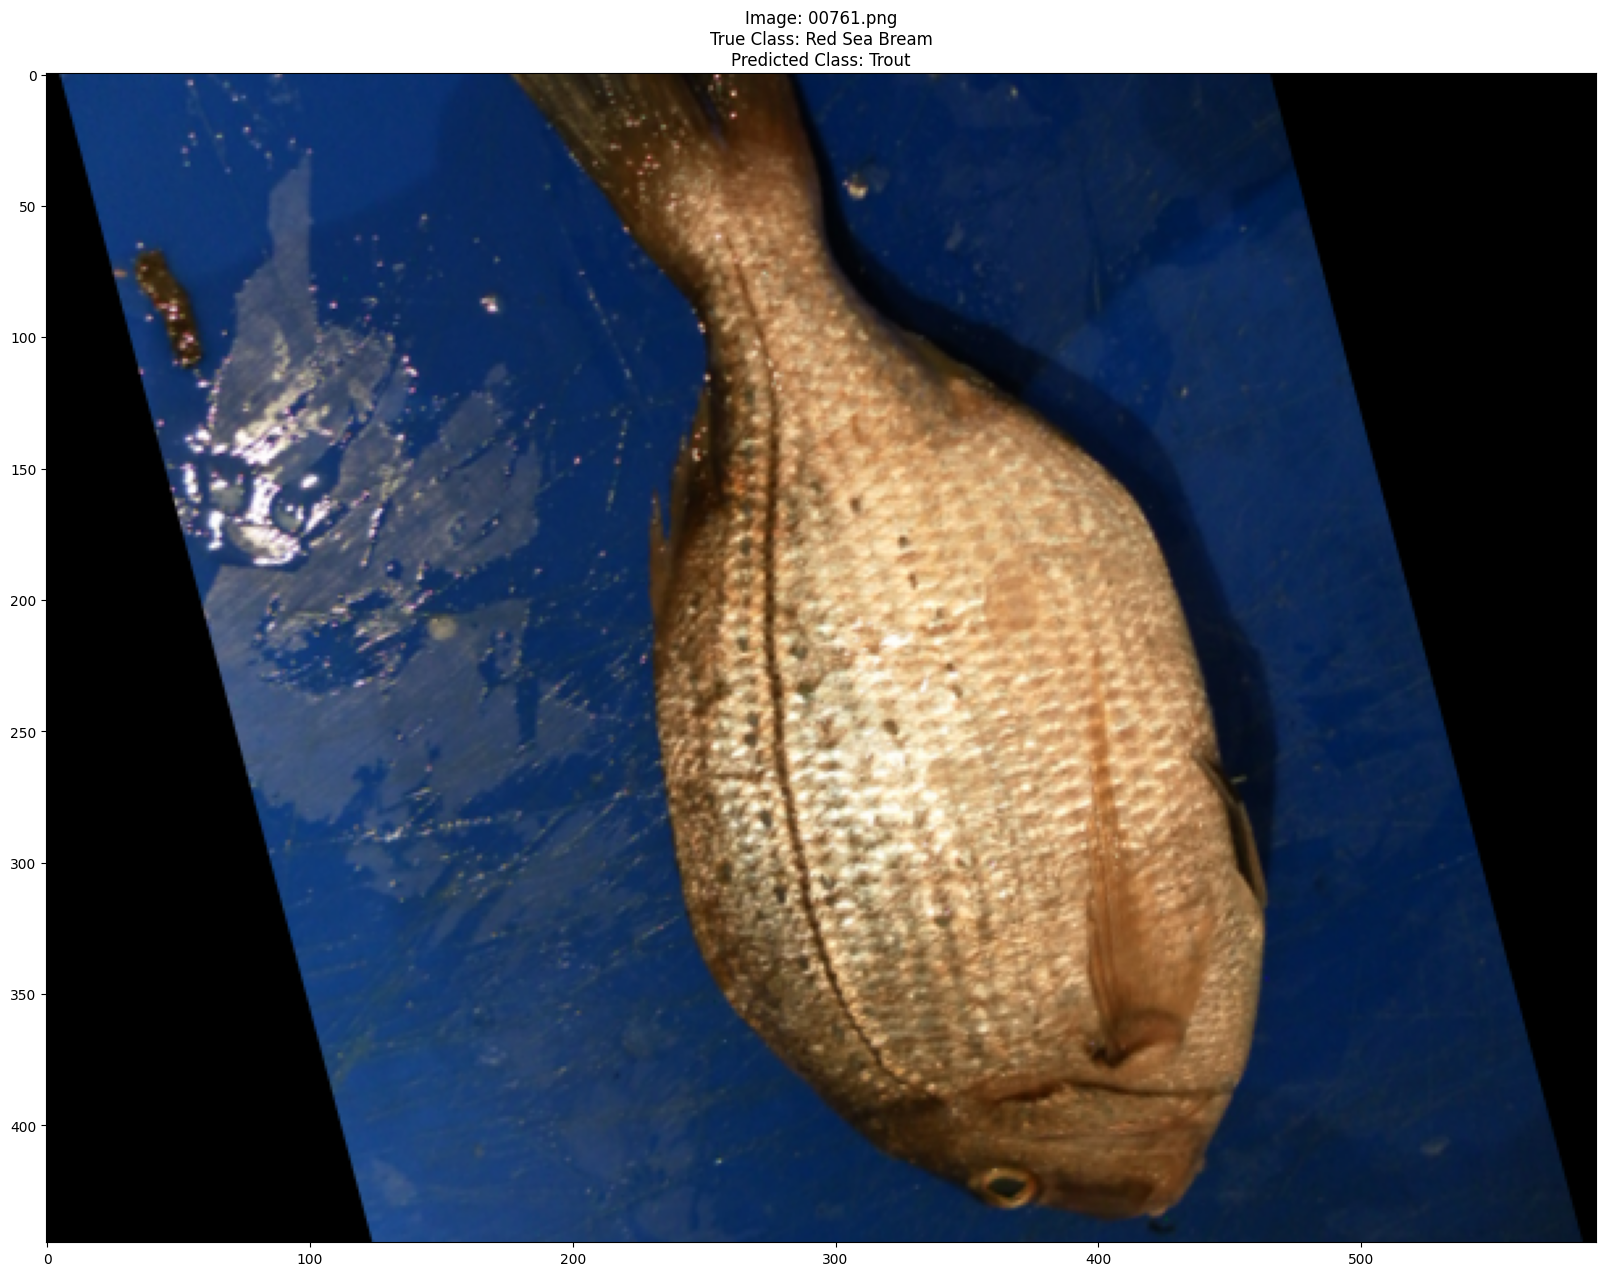

In [22]:
temp = predict_data[predict_data['label']!=predict_data['pred']].index[0]

plt.figure(figsize=(20,20))
plt.imshow(plt.imread(predict_data.path[temp]))
title1 = predict_data.path[temp].split('/')[-2]
title2 = predict_data.path[temp].split('/')[-1]
title3 = predict_data.pred[temp]
plt.title(f'Image: {title2}\nTrue Class: {title1}\nPredicted Class: {title3}')
plt.show()

Accuracy Score: 0.9172222222222223


<Axes: >

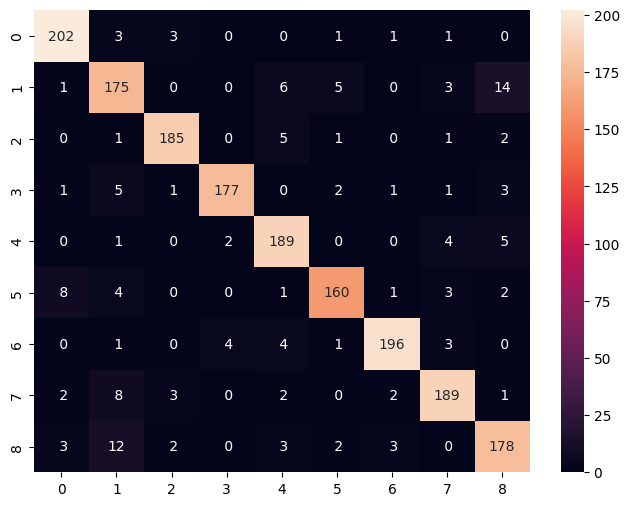

In [23]:
# Confusion Matrix

print(f"Accuracy Score: {accuracy_score(predict_data['label'],predict_data['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(predict_data['label'],predict_data['pred']), annot=True, fmt='2d')

In [24]:
# Classification Report

print(classification_report(predict_data['label'],predict_data['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.93      0.96      0.94       211
   Gilt-Head Bream       0.83      0.86      0.85       204
   Hourse Mackerel       0.95      0.95      0.95       195
        Red Mullet       0.97      0.93      0.95       191
     Red Sea Bream       0.90      0.94      0.92       201
          Sea Bass       0.93      0.89      0.91       179
            Shrimp       0.96      0.94      0.95       209
Striped Red Mullet       0.92      0.91      0.92       207
             Trout       0.87      0.88      0.87       203

          accuracy                           0.92      1800
         macro avg       0.92      0.92      0.92      1800
      weighted avg       0.92      0.92      0.92      1800

